In [33]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [4]:
water_df = pd.read_csv("water_potability.csv")
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
water_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
def handle_missing_values(df, method="drop"):
    
    if method == "drop":
        handled_df = df.dropna()
        
    return handled_df

In [10]:
def transform_data(X_train_df, X_test_df, min_max_cols):
    ct = make_column_transformer(
        (MinMaxScaler(), min_max_cols)
    )
    ct.fit(X_train_df)
    X_train_df_transformed = ct.transform(X_train_df)
    X_test_df_transformed = ct.transform(X_test_df)
    
    return X_train_df_transformed, X_test_df_transformed

In [11]:
droped_missing_df = handle_missing_values(water_df)

In [12]:
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
droped_missing_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
X_df = droped_missing_df.drop("Potability", axis=1)
y_df = droped_missing_df["Potability"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [60]:
list(droped_missing_df.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [61]:
X_train_transformed, X_test_transformed = transform_data(X_train,
                                                              X_test,
                                                              ['ph',
                                                             'Hardness',
                                                             'Solids',
                                                             'Chloramines',
                                                             'Sulfate',
                                                             'Conductivity',
                                                             'Organic_carbon',
                                                             'Trihalomethanes',
                                                             'Turbidity'])

In [68]:
model = Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="Adam",
             metrics=["accuracy"])
history = model.fit(
    x=X_test_transformed,
    y=y_test,
    epochs=150,
    steps_per_epoch=51,
    validation_data=(X_test_transformed, y_test),  
    validation_steps=51,
)

Epoch 1/150
51/51 [==============================] - 1s 5ms/step - loss: 0.6849 - accuracy: 0.5732 - val_loss: 0.6886 - val_accuracy: 0.5732
Epoch 2/150
51/51 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5558 - val_loss: 0.6796 - val_accuracy: 0.5732
Epoch 3/150
51/51 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5732 - val_loss: 0.6778 - val_accuracy: 0.5732
Epoch 4/150
51/51 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5732 - val_loss: 0.6757 - val_accuracy: 0.5732
Epoch 5/150
51/51 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5633 - val_loss: 0.6743 - val_accuracy: 0.5732
Epoch 6/150
51/51 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5732 - val_loss: 0.6758 - val_accuracy: 0.5732
Epoch 7/150
51/51 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.5732 - val_loss: 0.6686 - val_accuracy: 0.5732
Epoch 8/150
5

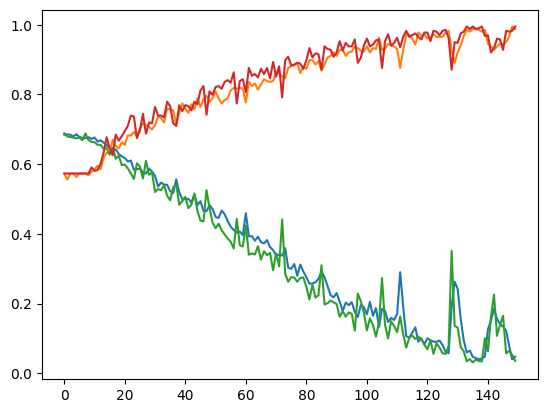

In [69]:
for name, values in history.history.items():
    plt.plot(values)

In [70]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://3a1b4ba8-fabc-47d4-9c3b-16bcf766dad6/assets


In [ ]:
from flask import Flask, render_template, request, jsonify
import joblib

app = Flask(__name__)

# Load the machine learning model
model = joblib.load('model.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    ph = float(data['ph'])
    hardness = float(data['Hardness'])
    solids = float(data['Solids'])
    chloramines = float(data['Chloramines'])
    sulfate = float(data['Sulfate'])
    conductivity = float(data['Conductivity'])
    organic_carbon = float(data['Organic_carbon'])
    trihalomethanes = float(data['Trihalomethanes'])
    turbidity = float(data['Turbidity'])

    # Make prediction using the loaded model
    prediction = model.predict([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]])

    # Return the prediction as JSON
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
from flask import Flask, render_template, request, jsonify
import joblib

In [13]:
# prediction function
def ValuePredictor(to_predict_list):
	to_predict = np.array(to_predict_list).reshape(1, 12)
	loaded_model = pickle.load(open("model.pkl", "rb"))
	result = loaded_model.predict(to_predict)
	return result[0]

@app.route('/result', methods = ['POST'])
def result():
	if request.method == 'POST':
		to_predict_list = request.form.to_dict()
		to_predict_list = list(to_predict_list.values())
		to_predict_list = list(map(int, to_predict_list))
		result = ValuePredictor(to_predict_list)	 
		if int(result)== 1:
			prediction ='Income more than 50K'
		else:
			prediction ='Income less that 50K'		
		return render_template("results.html", prediction = prediction)


AssertionError: View function mapping is overwriting an existing endpoint function: result

In [11]:
# prediction function
def ValuePredictor(to_predict_list):
    to_predict = np.array(to_predict_list).reshape(1, 12)
    loaded_model = pickle.load(open("model.pkl", "rb"))
    result = loaded_model.predict(to_predict)
    return result[0]

# Use a different endpoint name for the second route
@app.route('/result', methods=['POST'])
def result():
    if request.method == 'POST':
        to_predict_list = request.form.to_dict()
        to_predict_list = list(to_predict_list.values())
        to_predict_list = list(map(int, to_predict_list))
        result = ValuePredictor(to_predict_list)
        if int(result) == 1:
            prediction = 'Water is potable'
        else:
            prediction = 'Water is not potable'
        return render_template("result.html", prediction=prediction)

# Example: Use a different endpoint name for another route
@app.route('/another_endpoint', methods=['GET'])
def another_endpoint():
    # Your code for another endpoint
    return "Hello from another endpoint"


AssertionError: View function mapping is overwriting an existing endpoint function: result